import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram


#### Unsupervised Learning

The objectives of this unsupervised learning task are to:
- **[Data Cleaning](#handling-missing-values)**: Handle missing data in the dataset..
- [**Feature Engineering**](#encoding): Derive additional features from existing data to enhance model performance.
- [**Data Visualizations**](#visualizations): Data Visualizations.
- [**Unsupervised Learning**](#unsupervised-learning): Apply unsupervised models.

## Why the dataset is suitable for unsupervised learning
### 1. Clustering
Objective: Group similar instances based on features.

Suitability:

Feature Variety: Includes diverse features like age, workclass, education, which are useful for clustering.
Missing Values: Offers an opportunity to explore techniques for handling missing data.
Example: Use K-means or DBSCAN to identify customer segments.

### 2. Dimensionality Reduction
Objective: Simplify data for visualization or preprocessing.

Suitability:

High-Dimensional: 14 features provide rich data for reduction techniques.
Missing Data: Apply imputation before reducing dimensions.
Example: Use PCA or t-SNE to visualize the data in 2D or 3D.

### 3. Anomaly Detection
Objective: Identify unusual or rare instances.

Suitability:

Rich Features: Useful for detecting anomalies with various features.
Missing Values: Handling missing data is part of the anomaly detection process.
Example: Apply Isolation Forest or LOF to find outliers.




In [2]:
income_df = pd.read_csv('/Users/joycendichu/sample-be-test/adult_dataset.csv')

In [3]:
income_df.head(35)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
null_columns = [income_df[column].isnull().value_counts()  for column in income_df.columns ]

In [5]:
income_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
missing_percentages = income_df.isna().mean() * 100
print(missing_percentages)

age               0.000000
workclass         1.971664
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.977806
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.560993
income            0.000000
dtype: float64


## <a name="handling-missing-values"></a>1. Data cleaning

### Overview
Missing values can skew analysis and predictions. We’ll start by calculating both the sum and percentage of missing values per feature to understand their extent and impact


### 1. Identifying Rows with Special Characters



In [8]:
pattern = r'[?]'
rows_with_special_chars = income_df[income_df.apply(lambda x: x.astype(str).str.contains(pattern, regex=True, na=False)).any(axis=1)]

print("Rows containing special characters:")
print(rows_with_special_chars)

Rows containing special characters:
       age workclass  fnlwgt     education  education-num  \
14      40   Private  121772     Assoc-voc             11   
27      54         ?  180211  Some-college             10   
38      31   Private   84154  Some-college             10   
51      18   Private  226956       HS-grad              9   
61      32         ?  293936       7th-8th              4   
...    ...       ...     ...           ...            ...   
32530   35         ?  320084     Bachelors             13   
32531   30         ?   33811     Bachelors             13   
32539   71         ?  287372     Doctorate             16   
32541   41         ?  202822       HS-grad              9   
32542   72         ?  129912       HS-grad              9   

              marital-status     occupation   relationship  \
14        Married-civ-spouse   Craft-repair        Husband   
27        Married-civ-spouse              ?        Husband   
38        Married-civ-spouse          Sales  

### Replacing Special Characters with NaN

This section of the notebook replaces occurrences of a special character (`?`) in the `income_df` DataFrame with `NaN` values. 


In [9]:
income_df.replace('?', np.NaN, inplace=True)

print(income_df)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [10]:
missing_percentages = income_df.isna().mean() * 100
print(missing_percentages)

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
income            0.000000
dtype: float64


## 2. Group-Based Mode Imputation

### Objective
Handle missing values by imputing them with the mode of each group.

### Method
Impute missing values within groups defined by a specific column using the mode of the group.

### Grouping Column
The column used for grouping is `education`.

### Implementation
The function `impute_missing_values` performs the following steps:
1. Check for Missing Values in Grouping Column
2. Impute Missing Values
  

In [11]:
def impute_missing_values(df, group_by_column, columns_to_impute):
    if df[group_by_column].isnull().any():
        raise ValueError(f"The grouping column '{group_by_column}' contains missing values.")

    for column in columns_to_impute:
        if column in df.columns:
            df[column] = df.groupby(group_by_column)[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else pd.NA))
    
    return df



columns_with_missing = ['workclass', 'occupation', 'native-country']

# Call the function
income_df = impute_missing_values(income_df, group_by_column='education', columns_to_impute=columns_with_missing)
print(income_df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [12]:
income_df = income_df.drop(columns='income')


In [13]:
income_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

**Describe**: Provides basic statistics like mean, minimum, and maximum for numeric columns, helping us see the data distribution.


In [14]:
income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
income_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

## <a name="encoding"></a>1. Feature Engineering

### Overview
In this section, we introduce new features derived from the original dataset. These new features aim to capture more comprehensive and insightful information, improving the dataset's quality and its potential for machine learning models.


In [17]:
income_df['education'].unique()


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

### Feature: Education_encoded

Technique: Ordninal Encoding

Rationale: Encodes education levels to preserve their order, allowing unsupervised models to identify patterns based on educational attainment

In [18]:
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters',
    'Doctorate', 'Prof-school'
]

education_mapping = {level: index for index, level in enumerate(education_order)}

income_df['education_encoded'] = income_df['education'].map(education_mapping)

income_df_encoded = income_df.copy()

income_df_encoded.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,education_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,12
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,12
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,8
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,6
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,12


In [19]:
print(income_df['race'].unique())
print(income_df['sex'].unique())


['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']


### Feature: Race Encoded

Technique: One hot Encoding

Rationale: Transforms categorical variables into binary features, allowing models to differentiate between groups without implying any hierarchy or order, making the data more suitable for distance-based

In [20]:
income_df_encoded = pd.get_dummies(income_df, columns=['race', 'sex'])

income_df_encoded.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,education_encoded,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,12,False,False,False,False,True,False,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,12,False,False,False,False,True,False,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,8,False,False,False,False,True,False,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,6,False,False,True,False,False,False,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,12,False,False,True,False,False,True,False


In [21]:
income_df_encoded.dtypes

age                         int64
workclass                  object
fnlwgt                      int64
education                  object
education-num               int64
marital-status             object
occupation                 object
relationship               object
capital-gain                int64
capital-loss                int64
hours-per-week              int64
native-country             object
education_encoded           int64
race_Amer-Indian-Eskimo      bool
race_Asian-Pac-Islander      bool
race_Black                   bool
race_Other                   bool
race_White                   bool
sex_Female                   bool
sex_Male                     bool
dtype: object

### Features: Education_occupation_interaction

Rationale: Encodes education and occupation for analysis, with education_occupation_interaction capturing their combined effect

In [22]:
education_encoder = LabelEncoder()
occupation_encoder = LabelEncoder()

income_df_encoded['education_encoded'] = education_encoder.fit_transform(income_df_encoded['education'])
income_df_encoded['occupation_encoded'] = occupation_encoder.fit_transform(income_df_encoded['occupation'])

income_df_encoded['education_occupation_interaction'] = (
    income_df_encoded['education_encoded'] * income_df_encoded['occupation_encoded']
)

In [23]:
income_df_encoded.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,...,education_encoded,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,occupation_encoded,education_occupation_interaction
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,...,9,False,False,False,False,True,False,True,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,...,9,False,False,False,False,True,False,True,3,27
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,...,11,False,False,False,False,True,False,True,5,55
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,...,1,False,False,True,False,False,False,True,5,5
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,...,9,False,False,True,False,False,True,False,9,81


In [24]:
income_df_encoded.dtypes

age                                  int64
workclass                           object
fnlwgt                               int64
education                           object
education-num                        int64
marital-status                      object
occupation                          object
relationship                        object
capital-gain                         int64
capital-loss                         int64
hours-per-week                       int64
native-country                      object
education_encoded                    int64
race_Amer-Indian-Eskimo               bool
race_Asian-Pac-Islander               bool
race_Black                            bool
race_Other                            bool
race_White                            bool
sex_Female                            bool
sex_Male                              bool
occupation_encoded                   int64
education_occupation_interaction     int64
dtype: object

### Feature: Race and Gender

Technique: Binary Encoding

Rationale: Converts binary columns (race and sex) to integers for efficient processing by machine learning algorithms

In [25]:
 binary_columns = [
        'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 
        'race_Other', 'race_White', 'sex_Female', 'sex_Male'
    ]
for column in binary_columns:
    income_df_encoded[column] = income_df_encoded[column].astype(int)

In [26]:
income_df_encoded.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,...,education_encoded,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,occupation_encoded,education_occupation_interaction
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,...,9,0,0,0,0,1,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,...,9,0,0,0,0,1,0,1,3,27
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,...,11,0,0,0,0,1,0,1,5,55
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,...,1,0,0,1,0,0,0,1,5,5
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,...,9,0,0,1,0,0,1,0,9,81


### Feature: workclass_freq

Technique: Frequency Encoding

Rationale: Converts binary columns (race and sex) to integers for efficient processing by machine learning algorithms
Rationale: Encodes categorical features (workclass, occupation, marital-status, relationship, native-country) by mapping their frequency counts to integer values, capturing the relative prevalence of each category.

In [29]:
columns = ['workclass','occupation', 'marital-status','relationship','native-country','age']
for column in columns:
    frequency_encoding = income_df_encoded[column].value_counts().to_dict()
    income_df_encoded[f'Encoded_{column}'] = income_df_encoded[column].map(frequency_encoding)



In [30]:
income_df_encoded.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,...,sex_Female,sex_Male,occupation_encoded,education_occupation_interaction,Encoded_workclass,Encoded_occupation,Encoded_marital-status,Encoded_relationship,Encoded_native-country,Encoded_age
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,...,0,1,0,0,1981,6525,16117,12583,44662,1206
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,...,0,1,3,27,3862,6086,22379,19716,44662,866
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,...,0,1,5,55,36705,2072,6633,12583,44662,1264
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,...,0,1,5,5,36705,2072,22379,19716,44662,711
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,...,1,0,9,81,36705,6534,22379,2331,138,1280


### 4.Removing Redundant Features
age, workclass, education, marital-status, occupation, relationship, native-country: Removed as they have been replaced or transformed by newly created features that capture the same information more effectively.

In [31]:
columns_to_drop = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship','native-country']
income_df_encoded = income_df_encoded.drop(columns=columns_to_drop)


In [32]:
income_df_encoded.dtypes

fnlwgt                              int64
education-num                       int64
capital-gain                        int64
capital-loss                        int64
hours-per-week                      int64
education_encoded                   int64
race_Amer-Indian-Eskimo             int64
race_Asian-Pac-Islander             int64
race_Black                          int64
race_Other                          int64
race_White                          int64
sex_Female                          int64
sex_Male                            int64
occupation_encoded                  int64
education_occupation_interaction    int64
Encoded_workclass                   int64
Encoded_occupation                  int64
Encoded_marital-status              int64
Encoded_relationship                int64
Encoded_native-country              int64
Encoded_age                         int64
dtype: object

### Scaled_features

Rationale: Scales numerical features (education_encoded, capital-gain, capital-loss, hours-per-week) to standardize their range and distribution, improving the performance and convergence of unsupervised learning algorithms

In [33]:
numerical_features = [
    'education_encoded', 'capital-gain', 'capital-loss', 'hours-per-week',
    'education-num', 'fnlwgt', 'occupation_encoded', 'education_occupation_interaction',
    'Encoded_workclass', 'Encoded_occupation', 'Encoded_marital-status',
    'Encoded_relationship','Encoded_native-country','Encoded_age'

]

scaler = StandardScaler()

income_df_encoded[numerical_features] = scaler.fit_transform(income_df_encoded[numerical_features])


In [34]:
income_df_encoded.head(5)

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education_encoded,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,...,sex_Female,sex_Male,occupation_encoded,education_occupation_interaction,Encoded_workclass,Encoded_occupation,Encoded_marital-status,Encoded_relationship,Encoded_native-country,Encoded_age
0,-1.061979,1.136512,0.146932,-0.217127,-0.034087,-0.332542,0,0,0,0,...,0,1,-1.438425,-1.177547,-1.791770,0.661604,-0.067311,-0.078580,0.305917,0.527753
1,-1.007104,1.136512,-0.144804,-0.217127,-2.213032,-0.332542,0,0,0,0,...,0,1,-0.695894,-0.636854,-1.663576,0.429718,0.850585,1.066286,0.305917,-0.541164
2,0.246034,-0.419335,-0.144804,-0.217127,-0.034087,0.183660,0,0,0,0,...,0,1,-0.200873,-0.076136,0.574732,-1.690539,-1.457495,-0.078580,0.305917,0.710098
3,0.426663,-1.197259,-0.144804,-0.217127,-0.034087,-2.397350,0,0,1,0,...,0,1,-0.200873,-1.077419,0.574732,-1.690539,0.850585,1.066286,0.305917,-1.028465
4,1.408530,1.136512,-0.144804,-0.217127,-0.034087,-0.332542,0,0,1,0,...,1,0,0.789168,0.444531,0.574732,0.666358,0.850585,-1.724054,-3.283922,0.760400


In [35]:
income_df_encoded.dtypes


fnlwgt                              float64
education-num                       float64
capital-gain                        float64
capital-loss                        float64
hours-per-week                      float64
education_encoded                   float64
race_Amer-Indian-Eskimo               int64
race_Asian-Pac-Islander               int64
race_Black                            int64
race_Other                            int64
race_White                            int64
sex_Female                            int64
sex_Male                              int64
occupation_encoded                  float64
education_occupation_interaction    float64
Encoded_workclass                   float64
Encoded_occupation                  float64
Encoded_marital-status              float64
Encoded_relationship                float64
Encoded_native-country              float64
Encoded_age                         float64
dtype: object

## <a name="visualizations"></a>1.Data Visualizations

### 1. Heatmap of Feature Correlations

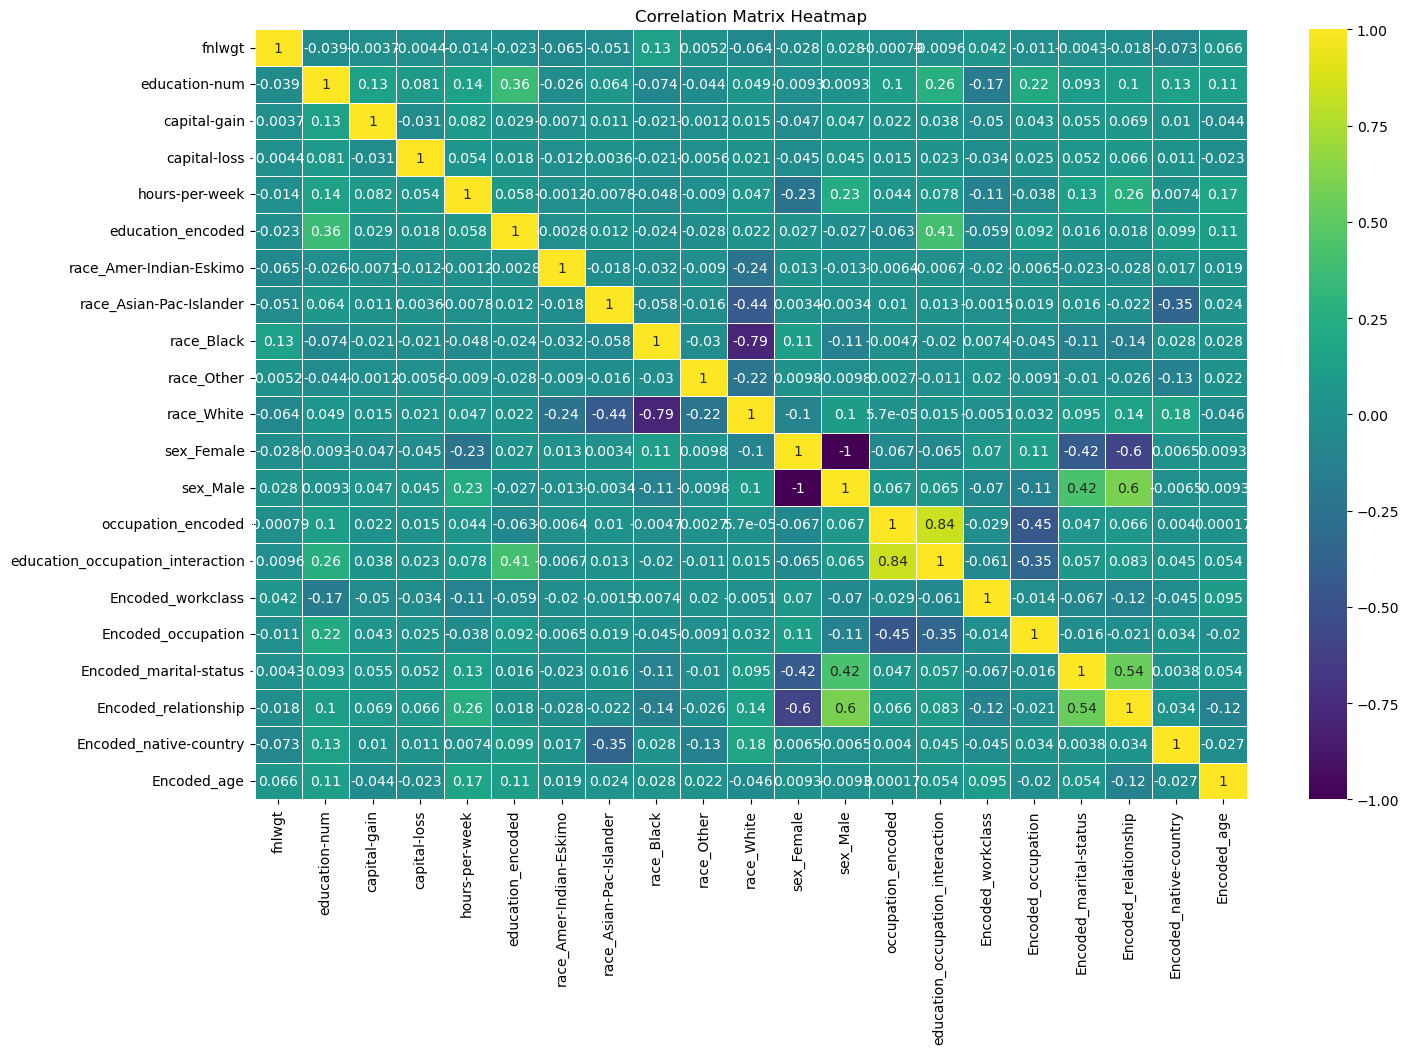

In [166]:
corr_matrix = income_df_encoded.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')

plt.show()

### Insights from the Visualization

Key Feature Interactions: education_occupation_interaction and occupation_encoded show high correlation (0.84), indicating important interactions for clustering.

Distinctive Contributions: capital-gain and capital-loss have weak correlations with other features, contributing uniquely to clustering.

### Plot histograms

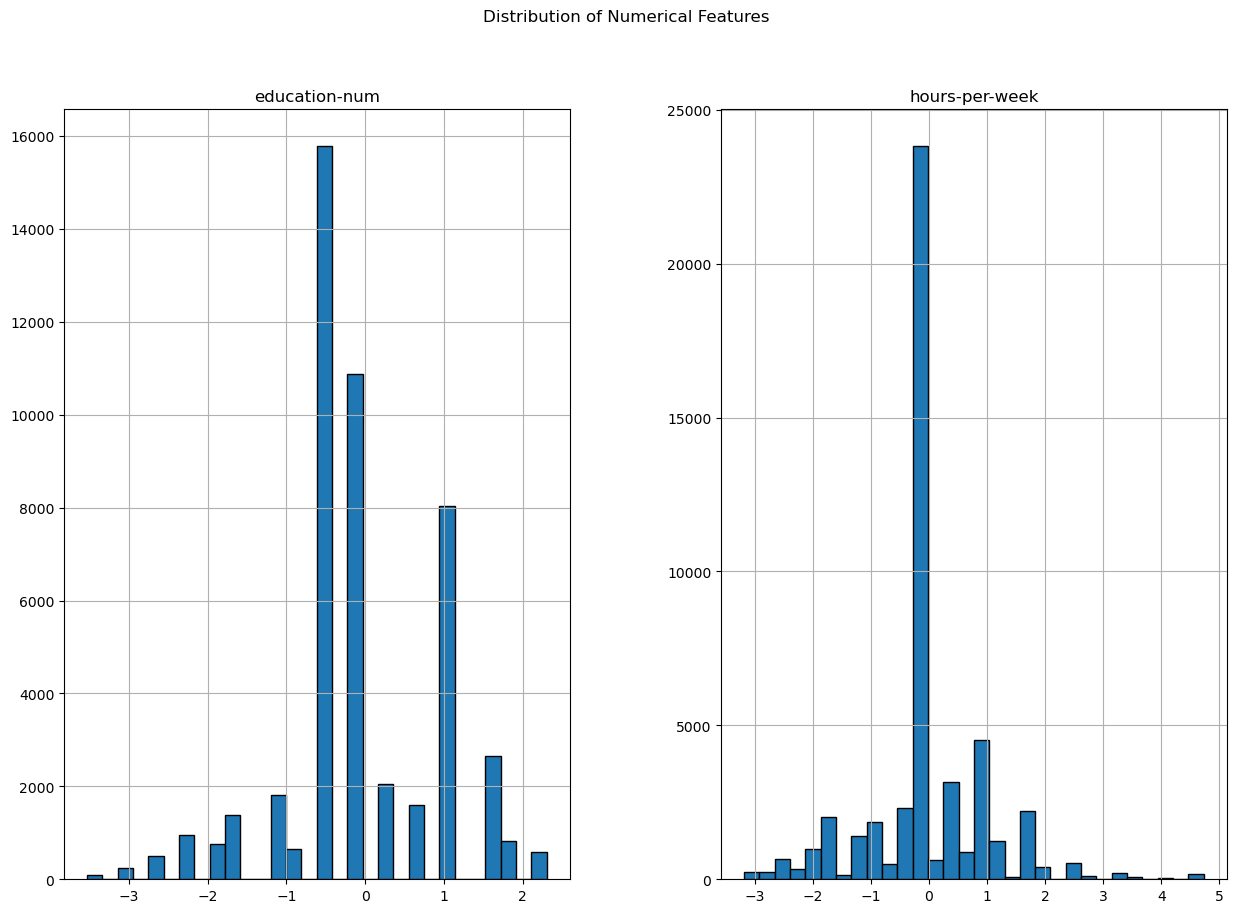

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = [ 'education-num', 'hours-per-week']
income_df_encoded[numerical_features].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

### Insights from the Visualization

Skewed Distribution of education-num: This feature is slightly left-skewed, with most values between -1 and 1, meaning most people have similar education levels with few extremes.

hours-per-week Clustered: Most values are clustered around 0, indicating that most people work similar hours each week, with few outliers.

### Cluster visualization

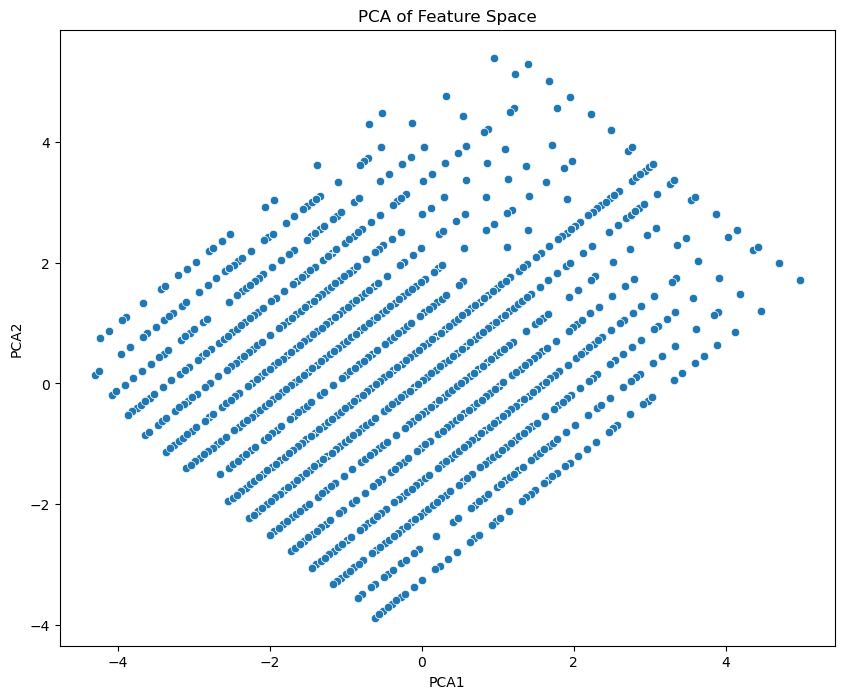

In [150]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(income_df_encoded[numerical_features])


pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA of Feature Space')
plt.show()

### Insights from the Visualization

Linear Patterns:
Distinct diagonal lines indicate strong linear dependencies between features, suggesting minimal variation orthogonal to the principal components.

Clustering Potential:
The clear lines suggest the presence of distinct groups or clusters, making the data suitable for clustering methods like K-Means.

### Box plots

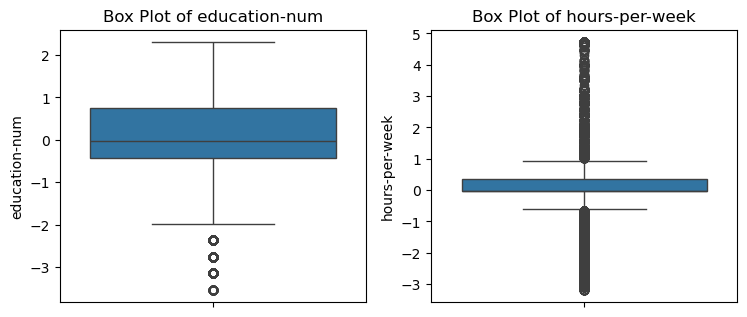

In [40]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=income_df_encoded[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

### Insights from the Visualization

Outliers Impact: Outliers in hours-per-week may distort clustering results, so consider handling them before applying algorithms.

Clustering Potential: Features like hours-per-week with distinct spread may indicate natural clusters, e.g., full-time vs. part-time workers.


### Unsupervised Learning Modeling

We will apply K-Means, DBSCAN, Hierarchical Clustering, PCA, Isolation Forest to explore patterns and structures in the data. These methods will help identify clusters, reduce dimensionality, and detect anomalies. The effectiveness of each will be evaluated based on clustering coherence, variance explained, and anomaly detection accuracy.

In [42]:
income_df_encoded.columns


Index(['fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education_encoded', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'sex_Female', 'sex_Male', 'occupation_encoded',
       'education_occupation_interaction', 'Encoded_workclass',
       'Encoded_occupation', 'Encoded_marital-status', 'Encoded_relationship',
       'Encoded_native-country', 'Encoded_age'],
      dtype='object')

### K-Means Clustering

In [43]:
X = income_df_encoded.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


K-Means Clustering:


Text(0, 0.5, 'PC 2')

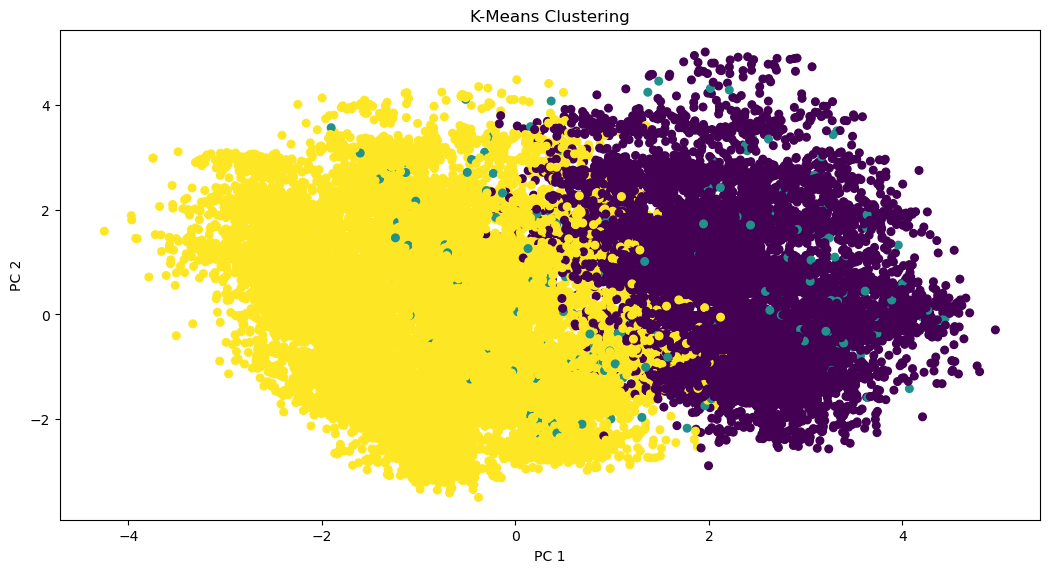

In [185]:
plt.figure(figsize=(43, 14))
plt.subplot(2, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.title('K-Means Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')


In [46]:
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_db_index = davies_bouldin_score(X_scaled, kmeans_labels)
print(f'Silhouette Score: {kmeans_silhouette}')
print(f'Davies-Bouldin Index: {kmeans_db_index}')

Silhouette Score: 0.17047155621926716
Davies-Bouldin Index: 1.7058107240196716


**Silhouette Score**: A score of 0.17 indicates weakly separated clusters, suggesting they overlap. Higher values (closer to 1) would show better-defined clusters.

**Davies-Bouldin Index**: A score of 1.71 suggests some cluster overlap. Lower values indicate better clustering.

### Hierarchical Clustering

In [171]:
Z = linkage(X_scaled, method='ward')
hierarchical_labels = fcluster(Z, t=3, criterion='maxclust')



Hierarchical Clustering:


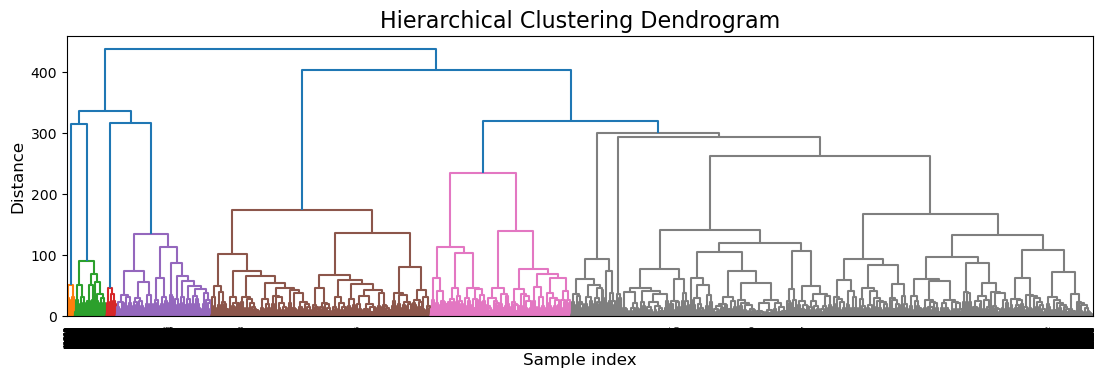

In [177]:
plt.figure(figsize=(45, 8))
plt.subplot(2, 3, 3)
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram', fontsize=16)  
plt.xlabel('Sample index', fontsize=12) 
plt.ylabel('Distance', fontsize=12) 
plt.show()

In [49]:
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
hierarchical_db_index = davies_bouldin_score(X_scaled, hierarchical_labels)
print(f'Silhouette Score: {hierarchical_silhouette}')
print(f'Davies-Bouldin Index: {hierarchical_db_index}')


Silhouette Score: 0.11149830437868447
Davies-Bouldin Index: 2.158095005236228


**Silhouette Score**: 0.11, which indicates very weakly separated clusters, implying significant overlap.

**Davies-Bouldin Index**: 2.16, a higher value indicating poor clustering, with notable overlap between clusters.

### Principal Component Analysis 


Principal Component Analysis (PCA):
Explained Variance Ratio: [0.57184445 0.42815555]


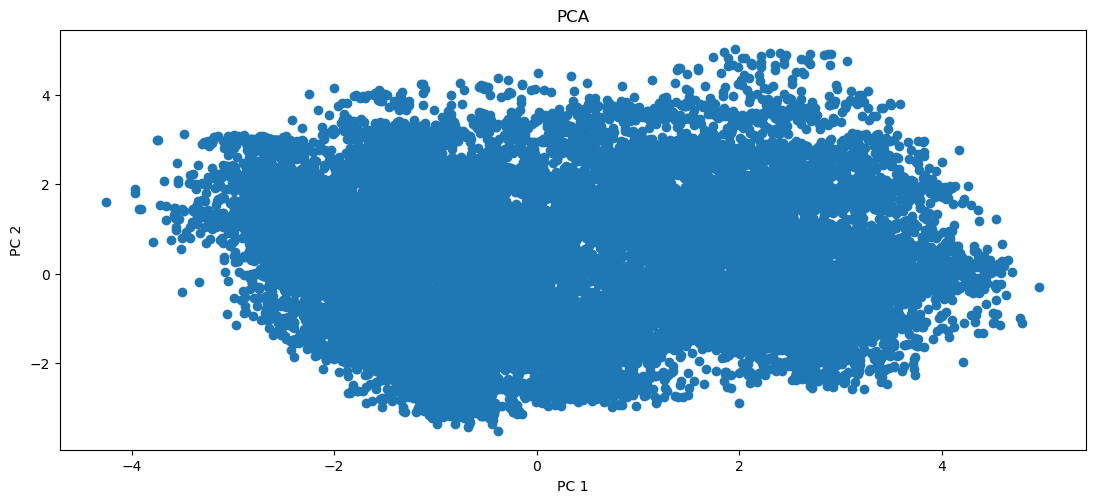

In [181]:
plt.figure(figsize=(45, 12))

plt.subplot(2, 3, 4)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

The PCA results show that PC 1 explains 57.18% of the variance, while PC 2 explains 42.82%. Together, these two components capture the entire variance in the data, allowing for effective dimensionality reduction.

### Isolation Forest

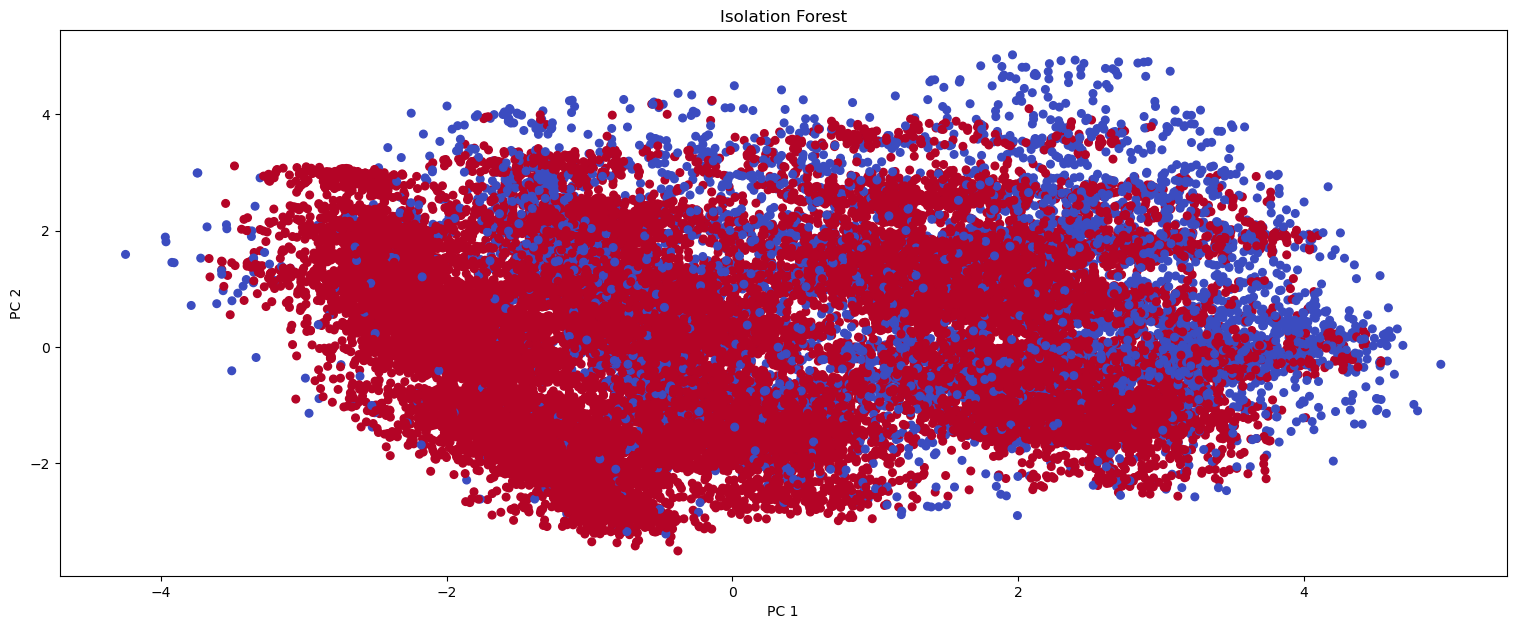

Number of outliers detected: 4885


In [199]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred = iso_forest.fit_predict(X_scaled)

plt.figure(figsize=(45, 12))

plt.subplot(2, 3, 6)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='coolwarm', s=30)
plt.title('Isolation Forest')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.tight_layout()
plt.show()


print(f'Number of outliers detected: {np.sum(y_pred == -1)}')

## Summary of Unsupervised Learning Models

| **Method**                 | **Metric**                  | **Value**                             | **Insight**                                     |
|----------------------------|-----------------------------|---------------------------------------|-------------------------------------------------|
| **K-Means Clustering**     | Silhouette Score            | 0.17                                  | Clusters are weakly separated.                 |
|                            | Davies-Bouldin Index        | 1.71                                  | Indicates some overlap between clusters.       |
| **Hierarchical Clustering**| Silhouette Score            | 0.11                                  | Very weak cluster separation.                 |
|                            | Davies-Bouldin Index        | 2.16                                  | Significant overlap between clusters.          |
| **Principal Component Analysis (PCA)** | Explained Variance Ratio | [0.5718, 0.4282]                     | PC 1 explains 57.18% and PC 2 explains 42.82% of the variance, capturing the entire variance. |
| **Isolation Forest**       | Number of outliers detected | 4885                                  | Indicates a significant number of anomalies in the data. |

### Insights

- **K-Means Clustering**: Shows some clustering potential but with noticeable overlap. Further tuning of the number of clusters or trying different methods might improve results.
- **Hierarchical Clustering**: Clusters are poorly defined with substantial overlap, suggesting the need for exploring other clustering techniques or adjusting parameters.
- **PCA**: Effectively reduces the dimensionality while preserving most of the variance in the data, providing a good basis for further analysis.
- **Isolation Forest**: Identifies a substantial number of outliers, indicating potential anomalies or unusual data points that may warrant further investigation.
